In [14]:
import json
import numpy as np
from numpy import linalg as LA
from scipy import stats
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, accuracy_score
import math



In [15]:
def rrm_event(bin_size,data):
    #print("Inside rrm_event()")
    baseline_start=0
    response_end=.2
    event_window=np.arange(baseline_start,response_end, bin_size)
    total_bins=len(event_window)
    event_times=data['events']
    neurons=data['neurons']
    relative_spikes=[]
    all_events=[]

    rrm=[]


    for event in event_times:
        #print('new loop')
        event_vals=event_times[event]
        all_neurons=[]
        for neuron in neurons:
            neuron_val=neurons[neuron]
            relative_spikes=[]
            rrm=[]
            for val in event_vals:
                relative_spikes.append(list(np.array(neuron_val)-val))


            for relative_spike in relative_spikes:
                binned_spikes = np.histogram(relative_spike, total_bins, range = (baseline_start, response_end))[0]
                rrm.append(list(binned_spikes))

            all_neurons.append(rrm)

        all_events.append(all_neurons)


    return(all_events)


def kmean(all_events):
    rrm_1=all_events[0]
    rrm_2=all_events[1]
    rrm_3=all_events[2]
    rrm_4=all_events[3]

    #print ('rrm shape: ', np.shape(rrm_2))

    rrm1_t = np.mean(rrm_1, axis=0)  
    rrm2_t = np.mean(rrm_2, axis=0)  
    rrm3_t = np.mean(rrm_3, axis=0)  
    rrm4_t = np.mean(rrm_4, axis=0)  


    #print('rrm avg shape: ', np.shape(rrm_2_avg))

    #rrm1_t=np.transpose(rrm_1,(1,0, 2))
    #rrm2_t=np.transpose(rrm_2,(1,0, 2))
    #rrm3_t=np.transpose(rrm_3,(1,0, 2))
    #rrm4_t=np.transpose(rrm_4,(1,0, 2))

    e1_len = len(rrm1_t)
    e2_len = len(rrm2_t)
    e3_len = len(rrm3_t)
    e4_len = len(rrm4_t)

    ground = []


    for i in range(e1_len):
        ground.append(0)

    for i in range(e2_len):
        ground.append(1)
        
    for i in range(e3_len):
        ground.append(2)

    for i in range(e4_len):
        ground.append(3)
    #mnts_1 = np.reshape(rrm1_t, (-1, len(rrm_1)))

    #mnts_2 = np.reshape(rrm2_t, (-1, len(rrm_2)))
    #print('mnts 2',len(mnts_2))
    #mnts_3 = np.reshape(rrm3_t, (-1, len(rrm_3)))
    #mnts_4 = np.reshape(rrm4_t, (-1, len(rrm_4)))
    #print('mnts len',(len(mnts_1)+len(mnts_2)+len(mnts_3)+len(mnts_4)))
    mnts = np.concatenate((rrm1_t, rrm2_t,rrm3_t,rrm4_t), axis=0)

    #mnts = mnts.reshape(-1, mnts.shape[2])
    #mnts = mnts.reshape(mnts.shape[0], -1)

    return(mnts, ground, e1_len, e2_len, e3_len, e4_len)




In [16]:
def get_confusion_matrix(ground, predicted):
    result_confusion = confusion_matrix(ground, predicted)
    accuracy = (result_confusion[0][0] + result_confusion[1][1] + result_confusion[2][2] + result_confusion[3][3])/sum(sum(result_confusion))
    print('Confusion Matrix: \n', result_confusion)
    print("Accuracy: ", accuracy)
    #return result_confusion, accuracy


def get_accuracy(ground, predicted, e1_len, e2_len, e3_len, e4_len):
    event_1 = predicted[0:e1_len]
    event_2 = predicted[e1_len:e1_len+e2_len]
    #event_3 = predicted[]

    unique1, count1 = np.unique(event_1, return_counts=True)
    print(unique1, count1)



In [17]:
def get_info(bin_size, data, rand):
    all_events=rrm_event(bin_size,data)
    all_rrm, ground, e1_len, e2_len, e3_len, e4_len = kmean(all_events)

    print("Shape after averaging across the neurons: ", np.shape(all_rrm))
    
    #plt.figure(figsize=(10, 6))
    #bin = bin_size*100
    #x_values = np.arange(0,200,bin)
    #x_labels = [str(x) for x in x_values]

    
    #x_values
    #plt.imshow(all_rrm, cmap='coolwarm', aspect='auto')  # Adjust colormap as needed
    #plt.colorbar()  # Add colorbar for reference
    #plt.title('Distribution of Spikes over Time')
    #plt.xlabel('Time (ms)')
    #plt.ylabel('Trial')
    #plt.xticks(x_values, x_labels)



    #print(len(all_rrm))

    #print(len(ground))

    # initial_centroids = np.array([[1, 2], [10, 2]])  # Specify your own initial centroids here
    # kmeans = KMeans(n_clusters=2, init=initial_centroids, random_state=0)
    #random_index = np.random.randint(len(X))

    # Extract the random point
    #initial = np.array([X[np.random.randint(0, 3)], X[np.random.randint(3,len(X))]])

    # ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

    # Code to choose initial centroids that are either one random data point from each event OR the mean of the event

    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    
    # for random centroids per event
    #idx = np.array([np.random.randint(0, e1_len), np.random.randint(e1_len,e1_len+e2_len), 
                         #np.random.randint(e1_len+e2_len,e1_len+e2_len+e3_len), np.random.randint(e1_len+e2_len+e3_len,e1_len+e2_len+e3_len+e4_len)])
    
    #print(idx)
    #initial_centroids = np.array([ all_rrm[idx[0]] , all_rrm[idx[1]] , all_rrm[idx[2]] , all_rrm[idx[3]] ])
        
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    
    # for means of event as centroid
    initial_centroids = np.array([np.mean(all_rrm[0:e1_len], axis = 0), np.mean(all_rrm[e1_len:e1_len+e2_len], axis = 0),
                              np.mean(all_rrm[e1_len+e2_len:e1_len+e2_len+e3_len], axis = 0), 
                              np.mean(all_rrm[e1_len+e2_len+e3_len:e1_len+e2_len+e3_len+e4_len], axis = 0)])
    
    #print('cluster means: ', np.shape(cluster_means))

    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

    # code to set initial centroid 
    kmean_rrm=KMeans(n_clusters=4, init=initial_centroids, random_state=rand)
    
    #kmean_rrm=KMeans(n_clusters=4, random_state = rand)        
    kmean_rrm.fit(all_rrm)
    rrm_labels=kmean_rrm.labels_

    print("Bin size = {} ms".format(int(bin_size*1000)))
    get_confusion_matrix(ground, rrm_labels)
    #y_kmeans = kmean_rrm.predict(all_rrm)

    #print('rrm_labels',rrm_labels)
    #val=1+1
    #print(all_rrm)

    label, num = np.unique(rrm_labels, return_counts=True)
    print('\n')
    print('Labels: \n', label, '\n')
    print('Distribution: \n', num, '\n')

    event_1 = rrm_labels[0:e1_len]
    event_2 = rrm_labels[e1_len:e1_len+e2_len]
    event_3 = rrm_labels[e1_len+e2_len:e1_len+e2_len+e3_len]
    event_4 = rrm_labels[e1_len+e2_len+e3_len:len(ground)]

    #len(ground)

    events = [event_1, event_2, event_3, event_4]
    unique = []
    count = []

    #print(np.shape(events))
    
    for i in range(len(events)):
        unique1, count1 = np.unique(events[i], return_counts=True)
        unique.append(unique1)
        count.append(count1)
    #print(unique)
    #print(count)
    print('Unique within event: \n', unique, '\n')
    print('Count within event: \n', count, '\n')

    index = []
    max = []
    for i in range (len(unique)):
        ind = np.argmax(count[i])
        #print(ind)
        max.append(np.max(count[i]))
        #print('uni: ', unique[i][ind])
        index.append(unique[i][ind])
    
    print('\n')
    #print('Label for each event: \n', index)
    #print('Max count: \n', max, '\n')
    #max

    event_lengths = [e1_len, e2_len, e3_len, e4_len]
    event_lengths

    acc_per_event = []
    for i in range(len(event_lengths)):    
        acc = max[i] / event_lengths[i]
        acc_per_event.append(acc)

    total_acc = np.dot(np.array(acc_per_event), np.array(event_lengths)) / len(rrm_labels)

    print('Label for each event: \n', index)
    print('Max count: \n', max, '\n')
    print('Accuracy: \n', "({} + {} + {} + {}) / 300 = {} \n".format(max[0], max[1], max[2], max[3], total_acc))



    #print(unique)

    full_unique = unique
    full_count = count

    for i in range(len(full_unique)):
        for j in range(len(full_unique)):
            if j not in unique[i]:
                full_unique[i] = np.insert(unique[i], j, j) # my_array = np.insert(my_array, position, number)
                full_count[i] = np.insert(count[i], j, 0)

    #print(full_unique)
    #print(full_count)
                
    #print('Unique within event: \n', unique, '\n')
    print('Count within event: \n', full_count, '\n')

    # create data 
    x = np.arange(4) 

    width = 0.15
    
    # plot data in grouped manner of bar type 
    count_t = np.transpose(full_count)

    plt.figure()
    plt.bar(x-0.225, count_t[0], width, edgecolor='black', linewidth=1) 
    plt.bar(x-0.075, count_t[1], width, edgecolor='black', linewidth=1) 
    plt.bar(x+0.075, count_t[2], width, edgecolor='black', linewidth=1) 
    plt.bar(x+0.225, count_t[3], width, edgecolor='black', linewidth=1) 
    plt.legend(['0', '1', '2', '3'])
    plt.xticks(range(0,4))
    plt.xlabel('Event')
    plt.ylabel('Count')
    plt.title('Number of Predicted Labels per Event, binsize = {}ms '.format(bin_size*1000))
    plt.show()


    return num, full_count, index, total_acc
    #full_count


In [18]:
f = open('hw4.json')
data = json.load(f)
f.close()

rand = 12 #np.random.randint(0, 100)
accuracy = []
index = []
distribution = []
event_dist = []

Shape after averaging across the neurons:  (300, 200)
Bin size = 1 ms
Confusion Matrix: 
 [[55  5 11  0]
 [ 2 52  8 15]
 [21  7 43  1]
 [ 1 15  3 61]]
Accuracy:  0.7033333333333334


Labels: 
 [0 1 2 3] 

Distribution: 
 [79 79 65 77] 

Unique within event: 
 [array([0, 1, 2]), array([0, 1, 2, 3]), array([0, 1, 2, 3]), array([0, 1, 2, 3])] 

Count within event: 
 [array([55,  5, 11], dtype=int64), array([ 2, 52,  8, 15], dtype=int64), array([21,  7, 43,  1], dtype=int64), array([ 1, 15,  3, 61], dtype=int64)] 



Label for each event: 
 [0, 1, 2, 3]
Max count: 
 [55, 52, 43, 61] 

Accuracy: 
 (55 + 52 + 43 + 61) / 300 = 0.7033333333333334 

Count within event: 
 [array([55,  5, 11,  0], dtype=int64), array([ 2, 52,  8, 15], dtype=int64), array([21,  7, 43,  1], dtype=int64), array([ 1, 15,  3, 61], dtype=int64)] 



c:\Users\winni\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\winni\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)


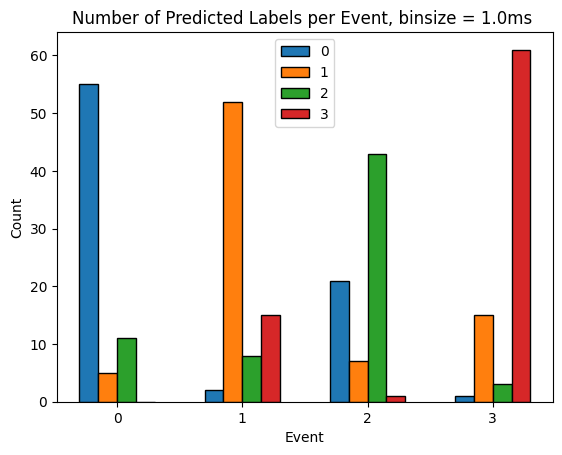

In [19]:
bin_size = 0.001
dist, ed, ind, acc = get_info(bin_size, data, rand)
accuracy.append(acc)
index.append(ind)
distribution.append(dist)
event_dist.append(ed)

Shape after averaging across the neurons:  (300, 40)
Bin size = 5 ms
Confusion Matrix: 
 [[50  5 16  0]
 [ 3 38 16 20]
 [28  7 36  1]
 [ 1 18  1 60]]
Accuracy:  0.6133333333333333


Labels: 
 [0 1 2 3] 

Distribution: 
 [82 68 69 81] 

Unique within event: 
 [array([0, 1, 2]), array([0, 1, 2, 3]), array([0, 1, 2, 3]), array([0, 1, 2, 3])] 

Count within event: 
 [array([50,  5, 16], dtype=int64), array([ 3, 38, 16, 20], dtype=int64), array([28,  7, 36,  1], dtype=int64), array([ 1, 18,  1, 60], dtype=int64)] 



Label for each event: 
 [0, 1, 2, 3]
Max count: 
 [50, 38, 36, 60] 

Accuracy: 
 (50 + 38 + 36 + 60) / 300 = 0.6133333333333333 

Count within event: 
 [array([50,  5, 16,  0], dtype=int64), array([ 3, 38, 16, 20], dtype=int64), array([28,  7, 36,  1], dtype=int64), array([ 1, 18,  1, 60], dtype=int64)] 



c:\Users\winni\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\winni\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)


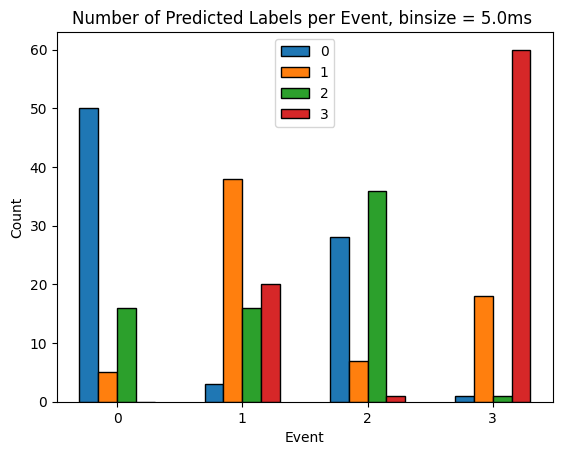

In [20]:
bin_size = 0.005
dist, ed, ind, acc = get_info(bin_size, data, rand)
accuracy.append(acc)
index.append(ind)
distribution.append(dist)
event_dist.append(ed)

Shape after averaging across the neurons:  (300, 4)
Bin size = 50 ms
Confusion Matrix: 
 [[51  2 18  0]
 [ 5 38 14 20]
 [26 12 34  0]
 [ 0 19  2 59]]
Accuracy:  0.6066666666666667


Labels: 
 [0 1 2 3] 

Distribution: 
 [82 71 68 79] 

Unique within event: 
 [array([0, 1, 2]), array([0, 1, 2, 3]), array([0, 1, 2]), array([1, 2, 3])] 

Count within event: 
 [array([51,  2, 18], dtype=int64), array([ 5, 38, 14, 20], dtype=int64), array([26, 12, 34], dtype=int64), array([19,  2, 59], dtype=int64)] 



Label for each event: 
 [0, 1, 2, 3]
Max count: 
 [51, 38, 34, 59] 

Accuracy: 
 (51 + 38 + 34 + 59) / 300 = 0.6066666666666667 

Count within event: 
 [array([51,  2, 18,  0], dtype=int64), array([ 5, 38, 14, 20], dtype=int64), array([26, 12, 34,  0], dtype=int64), array([ 0, 19,  2, 59], dtype=int64)] 



c:\Users\winni\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\winni\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)


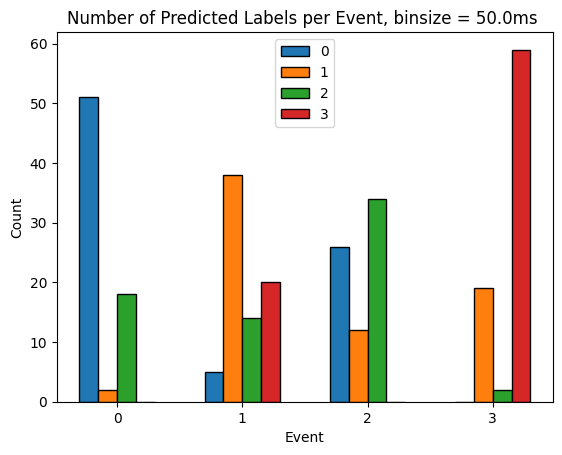

In [21]:
bin_size = 0.05
dist, ed, ind, acc = get_info(bin_size, data, rand)
accuracy.append(acc)
index.append(ind)
distribution.append(dist)
event_dist.append(ed)

Shape after averaging across the neurons:  (300, 1)
Bin size = 200 ms
Confusion Matrix: 
 [[49  2 19  1]
 [ 2 29 38  8]
 [19 12 40  1]
 [ 0 42 10 28]]
Accuracy:  0.4866666666666667


Labels: 
 [0 1 2 3] 

Distribution: 
 [ 70  85 107  38] 

Unique within event: 
 [array([0, 1, 2, 3]), array([0, 1, 2, 3]), array([0, 1, 2, 3]), array([1, 2, 3])] 

Count within event: 
 [array([49,  2, 19,  1], dtype=int64), array([ 2, 29, 38,  8], dtype=int64), array([19, 12, 40,  1], dtype=int64), array([42, 10, 28], dtype=int64)] 



Label for each event: 
 [0, 2, 2, 1]
Max count: 
 [49, 38, 40, 42] 

Accuracy: 
 (49 + 38 + 40 + 42) / 300 = 0.5633333333333334 

Count within event: 
 [array([49,  2, 19,  1], dtype=int64), array([ 2, 29, 38,  8], dtype=int64), array([19, 12, 40,  1], dtype=int64), array([ 0, 42, 10, 28], dtype=int64)] 



c:\Users\winni\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\winni\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)


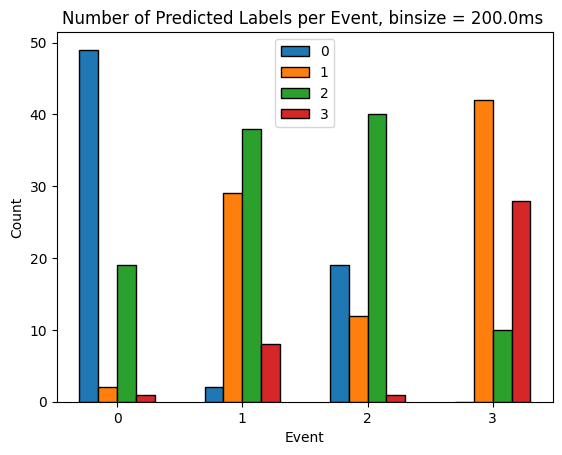

In [22]:
bin_size = 0.2
dist, ed, ind, acc = get_info(bin_size, data, rand)
accuracy.append(acc)
index.append(ind)
distribution.append(dist)
event_dist.append(ed)

In [23]:
print('Distribution: \n', distribution, '\n')
print('Distribution within Events: \n', event_dist, '\n')

print("**Accuracy is inaccurate if indexes are shared** ")
print('Indexes: \n', index, '\n')
print('Accuracy: \n', accuracy, '\n')

Distribution: 
 [array([79, 79, 65, 77], dtype=int64), array([82, 68, 69, 81], dtype=int64), array([82, 71, 68, 79], dtype=int64), array([ 70,  85, 107,  38], dtype=int64)] 

Distribution within Events: 
 [[array([55,  5, 11,  0], dtype=int64), array([ 2, 52,  8, 15], dtype=int64), array([21,  7, 43,  1], dtype=int64), array([ 1, 15,  3, 61], dtype=int64)], [array([50,  5, 16,  0], dtype=int64), array([ 3, 38, 16, 20], dtype=int64), array([28,  7, 36,  1], dtype=int64), array([ 1, 18,  1, 60], dtype=int64)], [array([51,  2, 18,  0], dtype=int64), array([ 5, 38, 14, 20], dtype=int64), array([26, 12, 34,  0], dtype=int64), array([ 0, 19,  2, 59], dtype=int64)], [array([49,  2, 19,  1], dtype=int64), array([ 2, 29, 38,  8], dtype=int64), array([19, 12, 40,  1], dtype=int64), array([ 0, 42, 10, 28], dtype=int64)]] 

**Accuracy is inaccurate if indexes are shared** 
Indexes: 
 [[0, 1, 2, 3], [0, 1, 2, 3], [0, 1, 2, 3], [0, 2, 2, 1]] 

Accuracy: 
 [0.7033333333333334, 0.6133333333333333, 0.6

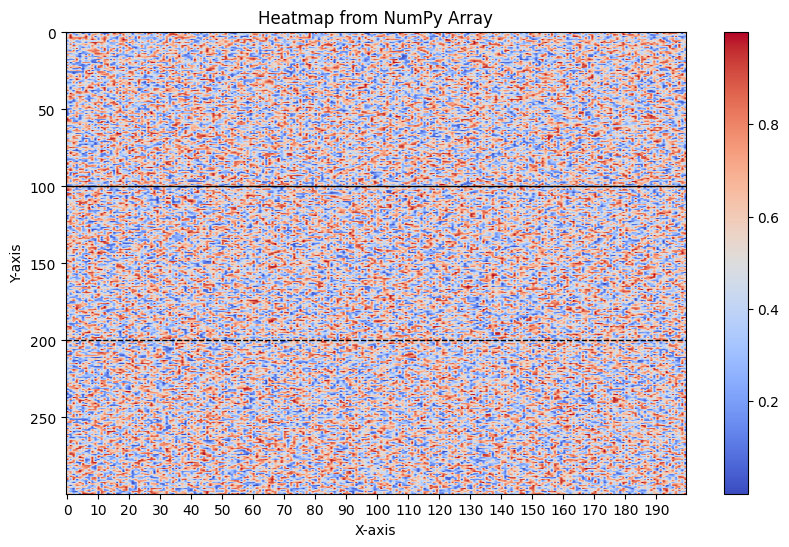

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Example numpy array of data with dimensions 300 by 200
data = np.random.rand(300, 200)  # Replace this with your actual data

# Create the heatmap
plt.figure(figsize=(10, 6))
plt.imshow(data, cmap='coolwarm', aspect='auto')  # Adjust colormap as needed
plt.colorbar()  # Add colorbar for reference
plt.title('Heatmap from NumPy Array')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')


bin = 10
x_values = np.arange(0,200,bin)
x_labels = [str(x) for x in x_values]
plt.xticks(x_values, x_labels)

# Add horizontal lines to create sections
plt.axhline(y=100, color='black', linewidth=1)
plt.axhline(y=200, color='black', linestyle='--', linewidth=1)

plt.show()


In [25]:
bin = 0.001
x_values = np.arange(0,0.2,bin)
x_values

array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
       0.009, 0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017,
       0.018, 0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026,
       0.027, 0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035,
       0.036, 0.037, 0.038, 0.039, 0.04 , 0.041, 0.042, 0.043, 0.044,
       0.045, 0.046, 0.047, 0.048, 0.049, 0.05 , 0.051, 0.052, 0.053,
       0.054, 0.055, 0.056, 0.057, 0.058, 0.059, 0.06 , 0.061, 0.062,
       0.063, 0.064, 0.065, 0.066, 0.067, 0.068, 0.069, 0.07 , 0.071,
       0.072, 0.073, 0.074, 0.075, 0.076, 0.077, 0.078, 0.079, 0.08 ,
       0.081, 0.082, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089,
       0.09 , 0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098,
       0.099, 0.1  , 0.101, 0.102, 0.103, 0.104, 0.105, 0.106, 0.107,
       0.108, 0.109, 0.11 , 0.111, 0.112, 0.113, 0.114, 0.115, 0.116,
       0.117, 0.118, 0.119, 0.12 , 0.121, 0.122, 0.123, 0.124, 0.125,
       0.126, 0.127,

In [26]:
print('Original Data')

print('[0 0 0 0 0][1 1 1 1 1][2 2 2 2 2][3 3 3 3 3]  \n')
print('____________')

#print('\n')
print( 'Situation 1')
print( 'Predicted by KMeans ')
print('[1 3 1 1 1][1 0 0 2 0][0 1 2 2 2][3 3 2 3 3]')
print(' 4 out of 5 trials in event 0 are classified together as label 1')
print(' 3 out of 5 events in event 1 are classified together as label 0')
print(' 3 out of 5 trials in event 0 are classified together as label 3')
print(' 4 out of 5 events in event 1 are classified together as label 2')
print(' Accuracy = ( 4 + 3 + 3 + 4) / 20 = 0.7 \n')

print('____________')

print( 'Situation 2')

print( 'Predicted by KMeans ')
print('[1 1 0 1 1][1 1 1 1 0]')
print(' 4 out of 5 trials in event 0 are classified together as label 1')
print(' 4 out of 5 events in event 1 are classified together as label 1')
print(' Accuracy = ( 4 + 3 ) / 10 = 0.7')






Original Data
[0 0 0 0 0][1 1 1 1 1][2 2 2 2 2][3 3 3 3 3]  

____________
Situation 1
Predicted by KMeans 
[1 3 1 1 1][1 0 0 2 0][0 1 2 2 2][3 3 2 3 3]
 4 out of 5 trials in event 0 are classified together as label 1
 3 out of 5 events in event 1 are classified together as label 0
 3 out of 5 trials in event 0 are classified together as label 3
 4 out of 5 events in event 1 are classified together as label 2
 Accuracy = ( 4 + 3 + 3 + 4) / 20 = 0.7 

____________
Situation 2
Predicted by KMeans 
[1 1 0 1 1][1 1 1 1 0]
 4 out of 5 trials in event 0 are classified together as label 1
 4 out of 5 events in event 1 are classified together as label 1
 Accuracy = ( 4 + 3 ) / 10 = 0.7
